---
title: "Modul 4 Sains Data: Model Klasifikasi"
subtitle: "Decision Tree, Support Vector Machine"
image: static\svm.png
description: "Online Melalui Zoom"
date: 03/24/2025
page-navigation: true
format: html
---

Kembali ke [Sains Data](./saindat2025genap.qmd)

# Metrik Evaluasi pada Klasifikasi

## 1. Jaccard Index

Mengukur akurasi dari model menggunakan irisan dari hasil prediksi dengan value sebenarnya.
$$J(y, \hat{y}) = \frac{|y \cap \hat{y}|}{|y|+|\hat{y}|-|y \cap \hat{y}|}$$

$y=$ actual label

$\hat{y}=$ predicted label

Contoh:

$y = [0,0,0,0,0,1,1,1,1,1]$

$\hat{y} = [1,1,0,0,0,1,1,1,1,1]$

$|y| = 10$

$|\hat{y}| = 10$

$|\hat{y}|-|y \cap \hat{y}| = 8$

$J(y, \hat{y}) = \frac{|y \cap \hat{y}|}{|y|+|\hat{y}|-|y \cap \hat{y}|} = \frac{8}{10+10-8} = 0.66$

- Rentang Jaccard index antara 0 hingga 1
- Semakin tinggi Jaccard Index, peforma model semakin baik

## 2. Confusion Matrix

Confusion Matrix merupakan tabel yang mengevaluasi performa model klasifikasi dengan membandingkan prediksi vs hasil aktual. 


\begin{array}{|c|c|c|}
\hline
 & \text{Prediksi Positif} & \text{Prediksi Negatif} \\
\hline
\text{Aktual Positif} & TP  & FN  \\
\hline
\text{Aktual Negatif} & FP & TN \\
\hline
\end{array}


dengan

- TP (True Positive): kasus positif, dengan hasil prediksi positif 

- FP (False Positive): kasus negatif, dengan hasil prediksi positif (Error Tipe I)

- FN (False Negative): kasus positif, dengan hasil prediksi negatif (Error Tipe II)

- TN (True Negative): kasus negatif, dengan hasil prediksi negatif 

Dari confusion Matrix, kita bisa punya metrik evaluasi berikut:

### Accuracy
Accuracy merupakan proporsi prediksi benar (baik positif maupun negatif) dari total keseluruhan prediksi.

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

### Precision
Precision mengukur seberapa akurat prediksi positif model. Perlu diperhatikan bahwa meningkatkan precision bisa menurunkan recall karena model menjadi lebih "hati-hati" dalam memprediksi positif.

$$Precision = \frac{TP}{(TP+FP)}$$

### Recall

Precision mengukur seberapa akurat prediksi positif model. Perlu diperhatikan bahwa meningkatkan recall biasanya akan menurunkan precision karena model menjadi lebih "agresif" dalam memprediksi positif.

$$Recall = \frac{TN}{(TP+FN)}$$

### F1- Score

F1 Score adalah rata-rata harmonik (harmonic mean) dari precision dan recall. Ini digunakan ketika kita ingin menyeimbangkan keduanya.

$$F1 \text{ } Score = \frac{2 . (Recall.Precision)}{(Recall+Precision)}$$

Cara mengukur performa menggunakan F1 score dengan mengambil rata rata F1 score dari masing masing label. 

Contoh, label 0 memiliki F1-score 0.72 dan label 1 memiliki F1 score 0.50.

Maka, F1 score dari model tersebut adalah 0.61

- Rentang F1 score berkisar di antara 0 hingga 1
- Semakin tinggi F1 score, maka peforma model tersebut makin baik

## 3. Log loss

Terkadang, output dari suatu model klasifikasi berbentuk probabilitas dari suatu item memiliki label tertentu. (Contohnya pada logistic regression minggu lalu)

Kita dapat menghitung untuk masing-masing item:
$$(y. \log(\hat{y}) + (1-y). \log(1-\hat{y}))$$

Kemudian, kita dapat menghitung rata rata dari tiap item tersebut
$$Logloss = -\frac{1}{n} \sum (y. \log(\hat{y}) + (1-y). \log(1-\hat{y}))$$

$y=$ actual label

$\hat{y}=$ predicted probability

Contoh:

![](.\static\ssmodul422_2.jpg)

- Rentang logloss berkisar di antara 0 hingga 1
- Semakin rendah logloss, maka peforma model tersebut makin baik

# Decision Tree

Decision Tree adalah algoritma machine learning berbasis pohon yang digunakan biasa untuk klasifikasi. Seperti namanya, pohon keputusan, konsepnya bentuknya pohon yang bercabang, yaitu membagi data secara berulang menjadi sub-kelompok yang lebih kecil berdasarkan fitur yang paling berpengaruh, hingga mencapai hasil yang optimal.

Biasanya digunakan sebagai simple binary classifier.

![](.\static\ssmodul422_3.jpg)

- Mencari fitur apa yg membuat suatu item memiliki label tertentu
- **Entropy** = tolak ukur seberapa random data di fitur tersebut, entropy 0 artinya simpul (fitur) tersebut berpengaruh terhadap klasifikasi, entropy 0 itu baik
$$-P(A).\log(P(A)) - P(B).\log(P(B))$$
- **Information gain** : informasi yang dapat meningkatkan kejelasan dari percabangan. $\newline$ InfoGain = Entropybefore - weightedentropyafter
- Pohon yg lebih baik adalah yang memiliki infogain lebih tinggi

Kali ini, kita akan mengklasifikasi resep obat yang cocok dari penyakit yang sama untuk fitur-fitur yang berbeda (Umur, Jenis Kelamin,Tekanan Darah, Kolestrol)

## Import Module

In [9]:
#import modul dan package
import numpy as np
import pandas as pd

## Import Data

Pada module kali ini, akan digunakan data csv drug200 (`drug200.csv`) yang bisa didownload dari:

* [Direct link (langsung dari GitHub Pages ini)](./drug200.csv)
* Kaggle: <https://www.kaggle.com/datasets/jeevanrh/drug200csv>

In [16]:
#muat dataset
my_data = pd.read_csv("./drug200.csv")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
my_data.shape

(200, 6)

In [18]:
#melihat ada brp value berbeda pada feature/kolom Drug
my_data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [19]:
#feature/kolom pada dataframe
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [20]:
#melihat value per baris
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

## Preprocessing

Pada bagian ini, kita akan mengubah value kategorik menjadi data numerik (encoding). Perhatikan bahwa data kategorik bersifat Ordinal, sehingga kita akan menggunakan LabelEncoder untuk melakukan encoding data tersebut.

Bedanya, OneHotEncoder bisa digunakan untuk data kategorik apapun tetapi akan membuat kolom baru untuk tiap kategori. Sedangkan, LabelEncoder dimaksudkan untuk data kategorik ordinal (yaitu ada urutannya), tetapi hanya menghasilkan satu kolom baru yang sekadar mengubah kategorinya menjadi urutan.

Apabila hanya ada dua kategori, meskipun tidak ada urutan, sebaiknya tetap menggunakan LabelEncoder daripada OneHotEncoder agar hemat kolom.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1]) #sex di kolom kedua df, indexnya 1
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [22]:
le_bp = LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_bp.transform(X[:, 2]) #sex di kolom ketiga df, indexnya 2
le_chol = LabelEncoder()
le_chol.fit(['NORMAL', 'HIGH'])
X[:, 3] = le_chol.transform(X[:, 3]) #sex di kolom keempat df, indexnya 3
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [23]:
y = my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


In [26]:
print(X_test.shape)
print(y_test.shape)

(60, 5)
(60,)


## Modelling

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
drugtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [29]:
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
predTree = drugtree.predict(X_test)
predTree

array(['drugX', 'drugA', 'drugY', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugB', 'drugX', 'drugA', 'drugY', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugY', 'drugA', 'drugY', 'drugA',
       'drugX', 'drugX', 'drugY', 'drugC', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugA', 'drugX', 'drugA', 'drugB',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugY', 'drugA', 'drugX', 'drugY', 'drugX', 'drugC',
       'drugY', 'drugX', 'drugB', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX'], dtype=object)

In [31]:
#bandingkan nilai y pada data uji dengan hasil prediksi
comparison = {"y_test" : y_test,
              "Predicted": predTree}
comp = pd.DataFrame(comparison)
comp

,y_test,Predicted
3,drugX,drugX
187,drugA,drugA
98,drugY,drugY
195,drugC,drugC
127,drugX,drugX
5,drugX,drugX
177,drugY,drugY
10,drugC,drugC
20,drugY,drugY
80,drugB,drugB


## Akurasi

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predTree))

Accuracy :  1.0


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test, predTree, labels=list(my_data["Drug"].unique())))

[[20  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  4]]


## Visualisasi Decision Tree

In [33]:
from sklearn import tree

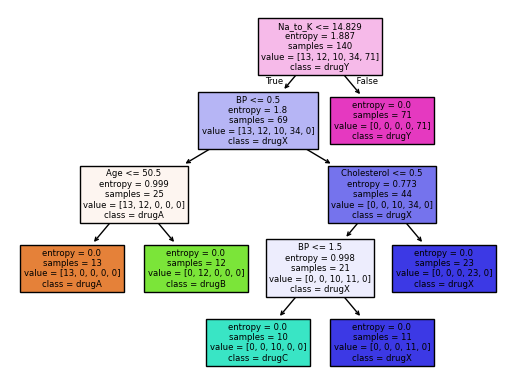

In [34]:
featureNames = my_data.columns[0:5]

graph = tree.plot_tree(drugtree,
                       feature_names=featureNames,
                       class_names=np.unique(y_train),
                       filled=True)

# Support Vector Machine

SVM adalah algoritma supervised learning utk klasifikasi dengan cara menemukan **separator** berupa hyperplane (biasanya utk binary classification)

1. Petakan fitur (kolom, bentuk awalnya 1d) ke ruang dimensi yg lebih tinggi (contohnya 3D) menggunakan fungsi kernel (linear, Radial Basis Function, polinom, sigmoid, dsb)
2. Temukan separatornya (utk di ruang 3d biasanya bentuknya bidang)

- Hyperplane yg baik adalah yg memiliki margin lebih besar (jarak ke support vector)

![SVM](.\static\ssmodul422_4.jpg)

Kali ini, kita akan melakukan klasifikasi sebuah cell apakah cell tersebut jinak atau ganas (berpotensi kanker)

In [ ]:
#install dulu package bila belum memiliki sklearn
!pip install scikit-learn==0.23.1

## Import Module

In [34]:
#import modul yang diperlukan
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

## Import Dataset

Pada module kali ini, akan digunakan data csv cell samples (`cell_samples.csv`) yang bisa didownload dari:

* [Direct download (langsung dari GitHub Pages ini)](./cell_samples.csv)
* Kaggle: <https://www.kaggle.com/datasets/sam1o1/cell-samplescsv>

In [35]:
#memuat dataframe
cell_df=pd.read_csv("./cell_samples.csv")

In [36]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


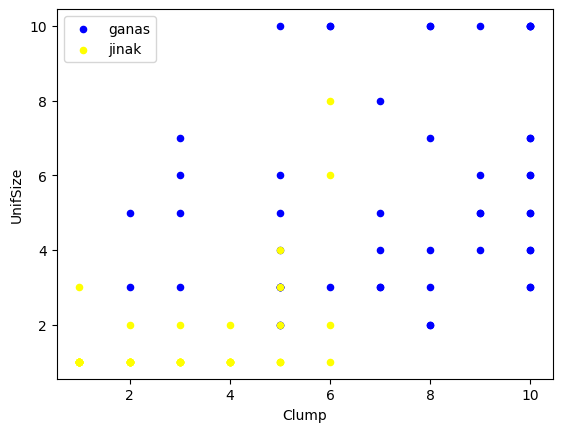

In [37]:
#melihat sebaran datanya menggunakan scatterplot
ax = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y = 'UnifSize', color = 'Blue',
                                             label = 'ganas')
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x='Clump', y = 'UnifSize', color = 'Yellow', 
                                        label ='jinak',ax=ax)
plt.show()

## Preprocessing

In [38]:
#cek type dari masing2 feature/kolom
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [39]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors="coerce").notnull()] #mengatasi value yg error menjadi NaN
cell_df['BareNuc']=cell_df['BareNuc'].astype('int') #mengubah type menjadi integer
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Train Test Split

In [40]:
#set X
feature_df = cell_df[['Clump', 'UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [41]:
#set Y
cell_df['Class'] = cell_df['Class'].astype('int')
y=np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [42]:
#train-test split
train_x,test_x,train_y,test_y=train_test_split(X,y, test_size=0.2,random_state=4)
print('Train set:', train_x.shape,train_y.shape)
print('Train set:', test_x.shape,test_y.shape)

Train set: (546, 9) (546,)
Train set: (137, 9) (137,)


## Modelling

In [43]:
#membuat model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(train_x,train_y)

SVC()

In [44]:
#Prediksi
yhat = clf.predict(test_x)
yhat[0:5]

array([2, 4, 2, 4, 2])

## Evaluasi

In [45]:
#jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(test_y,yhat,pos_label=2)

0.9444444444444444

In [46]:
#f1-score
from sklearn.metrics import f1_score
f1_score(test_y,yhat,pos_label=2)

0.9714285714285714

In [47]:
#visualisasi confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
 
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
print(confusion_matrix(test_y, yhat, labels=[2,4]))

[[85  5]
 [ 0 47]]


Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


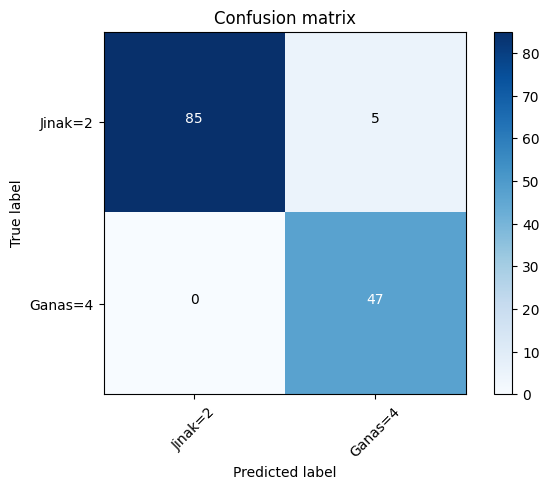

In [48]:
#confusion matrix
cnf_matrix =confusion_matrix(test_y, yhat, labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Jinak=2', 'Ganas=4'],normalize = False, title='Confusion matrix')


# K-Nearest Neighbor (Pengayaan)

![](./static/knn.jpg)

K-Nearest neighbor adalah salah satu jenis algoritma supervised learning. Biasanya, algoritma ini digunakan untuk masalah klasifikasi.
Kelas dari data tersebut ditentukan dari sejumlah k titik yang berperan "tetangga". Pada gambar di atas, ketika k = 3, bintang akan diklasifikasikan sebagai kelas ungu, sebab mayoritas dari tetangganya adalah ungu. Sedangkan, ketika k = 6, bintang akan diklasifikasikan sebagai kelas kuning. Untuk menentukan mana saja titik yang merupakan tetangganya, biasanya digunakan jarak euclidean

$$
d(P,Q) = \sqrt{\sum_{i=1}^n(p_i-q_i)^2}
$$

## Import Module

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Import Dataset

Pada module kali ini, akan digunakan data csv teleCust1000t (`teleCust1000t.csv`) yang bisa didownload dari:

- [Direct link (langsung dari GitHub Pages ini)](./teleCust1000t.csv)
- Kaggle: <https://www.kaggle.com/code/zohaib123/telecusts-prediction-k-nearest-neighbors>

In [4]:
#membaca dataset
df = pd.read_csv('./teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#menghitung jumlah anggota tiap kelas
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

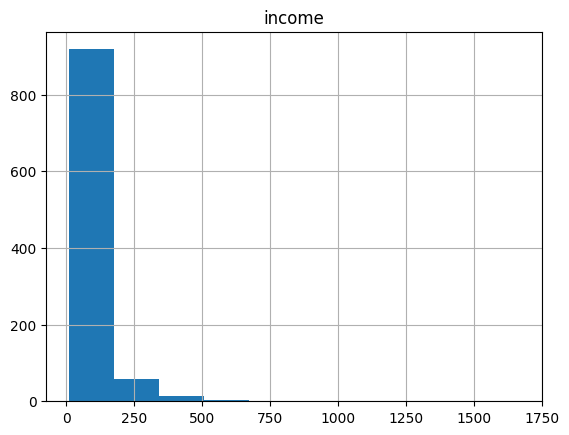

In [6]:
#melihat sebaran income dengan histogram
df.hist(column='income')

In [7]:
#melihat 4 row pertama
X = df.drop(columns="custcat")
X.head(4)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1


In [8]:
#melihat kelas dari 4 row pertama
y = df['custcat']
y.head(4)

0    1
1    4
2    3
3    1
Name: custcat, dtype: int64

## Preprocessing: normalisasi

Normalisasi adalah melakukan *scaling* pada keseluruhan data sehingga berada dalam rentang interval $[0, 1]$. Normalisasi bisa meningkatkan akurasi KNN karena

- data semua fitur berada di rentang yang sama, sehingga tidak ada bias (bias dalam artian lebih memperhatikan fitur lain karena rentangnya lebih besar sehingga perhitungan jarak menjadi lebih dipengaruhi oleh fitur lain itu)
- bilangan *floating-point* paling presisi di interval $[0, 1]$

`sklearn` menyediakan `class` untuk normalisasi bernama `MinMaxScaler`. Sebenarnya *min-max scaler* ini bisa diubah intervalnya selain $[0,1]$, dengan mengubah parameter `feature_range=(0, 1)` tetapi tidak kita lakukan

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
#normalize data
X_minmax = MinMaxScaler(feature_range=(0, 1))
X_minmax.fit(X)
X_sc = X_minmax.transform(X.astype(float))

In [11]:
X_sc[0:4]

array([[0.5       , 0.16901408, 0.44067797, 1.        , 0.16363636,
        0.0331525 , 0.75      , 0.10638298, 0.        , 0.        ,
        0.14285714],
       [1.        , 0.14084507, 0.25423729, 1.        , 0.12727273,
        0.07655214, 1.        , 0.10638298, 0.        , 0.        ,
        0.71428571],
       [1.        , 0.94366197, 0.57627119, 1.        , 0.43636364,
        0.06449668, 0.        , 0.61702128, 0.        , 1.        ,
        0.14285714],
       [0.5       , 0.45070423, 0.25423729, 0.        , 0.21818182,
        0.01446655, 0.25      , 0.        , 0.        , 1.        ,
        0.        ]])

## Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [31]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 11)
(800,)
(200, 11)
(200,)


## Modelling

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#membuat model dengan k = 3
k = 3
tele_KNN = KNeighborsClassifier(n_neighbors = k)
tele_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediksi

In [42]:
#hasil prediksi
y_pred = tele_KNN.predict(X_test)
y_pred[0:5]

array([2, 2, 3, 3, 2], dtype=int64)

In [43]:
#kelas sebenarnya
y_test[0:5]

521    2
737    1
740    2
660    3
411    1
Name: custcat, dtype: int64

## Evaluasi Model

In [44]:
from sklearn import metrics

In [45]:
#menghitung akurasi
metrics.accuracy_score(y_test, y_pred)

0.355

## *Hyperparameter Tuning*: mencari $k$ terbaik

### Dengan Iterasi Manual

Kinerja model K-NN sangat bergantung pada jumlah k yang dipilih. Kita bisa saja menentukan k terbaik secara manual menggunakan loop.

In [65]:
#mencari k terbaik diantara 1<=k<=10
nk = 10

mean_acc= np.zeros((nk))
std_acc = np.zeros((nk))

for n in range(1,nk+1):
    neighbor_k = KNeighborsClassifier(n_neighbors= n).fit(X_train,y_train)
    ypredict = neighbor_k.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypredict)
    std_acc[n-1]= np.std(ypredict==y_test)/np.sqrt(ypredict.shape[0])

mean_acc

array([0.3  , 0.315, 0.355, 0.37 , 0.33 , 0.33 , 0.33 , 0.34 , 0.335,
       0.325])

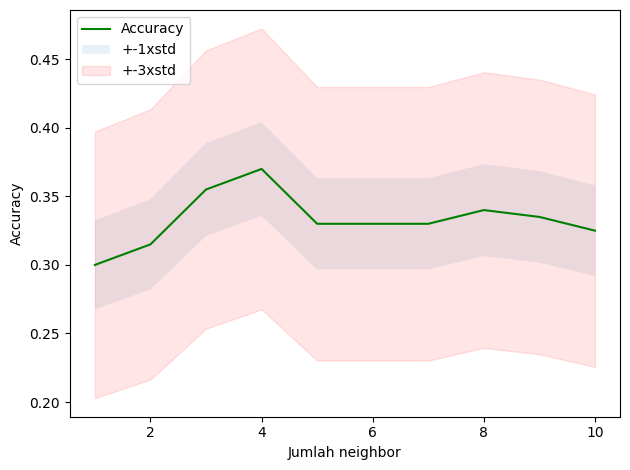

In [47]:
#plot akurasi dari beberapa k
plt.plot(range(1,nk+1),mean_acc,'g')
plt.fill_between(range(1,nk+1),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.fill_between(range(1,nk+1),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha = 0.10, color = "red")
plt.legend(('Accuracy', '+-1xstd', '+-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Jumlah neighbor')
plt.tight_layout()
plt.show()

In [48]:
#k terbaik beserta hasilnya
print("akurasi terbaik model adalah", mean_acc.max(), "dengan jumlah k=", mean_acc.argmax()+1)

akurasi terbaik model adalah 0.37 dengan jumlah k= 4


### Dengan Grid Search

Daripada cara manual, kita bisa menggunakan fitur *grid search* dari scikit-learn.

In [55]:
from sklearn.model_selection import GridSearchCV

Buatlah *dictionary* berisi semua nilai yang ingin dicoba untuk tiap parameter:

In [56]:
KNN_param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [57]:
KNN_auto = KNeighborsClassifier()

KNN_grid_search = GridSearchCV(KNN_auto, KNN_param_grid, scoring="accuracy")

In [58]:
# Lakukan grid search
KNN_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Lihat hasilnya:

In [64]:
pd.DataFrame(KNN_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002141,0.000717,0.008034,0.000427,1,{'n_neighbors': 1},0.28750,0.29375,0.35000,0.35000,0.28750,0.31375,0.029686,7
1,0.001997,0.000059,0.006910,0.000419,2,{'n_neighbors': 2},0.26250,0.28750,0.33750,0.31250,0.32500,0.30500,0.026926,9
2,0.002229,0.000588,0.007973,0.000569,3,{'n_neighbors': 3},0.24375,0.33750,0.29375,0.34375,0.26875,0.29750,0.038649,10
3,0.001671,0.000535,0.008170,0.001683,4,{'n_neighbors': 4},0.31250,0.35625,0.30000,0.30000,0.29375,0.31250,0.022707,8
4,0.001506,0.000445,0.009517,0.001015,5,{'n_neighbors': 5},0.32500,0.31250,0.31875,0.35625,0.30000,0.32250,0.018792,6
5,0.002476,0.000630,0.008799,0.000793,6,{'n_neighbors': 6},0.36875,0.31875,0.29375,0.38750,0.35000,0.34375,0.033773,2
6,0.002416,0.000407,0.009109,0.000519,7,{'n_neighbors': 7},0.35625,0.34375,0.27500,0.37500,0.28125,0.32625,0.040582,5
7,0.002481,0.000414,0.008786,0.000366,8,{'n_neighbors': 8},0.34375,0.38125,0.28750,0.38125,0.30000,0.33875,0.039410,4
8,0.002013,0.000543,0.008832,0.000879,9,{'n_neighbors': 9},0.34375,0.38125,0.29375,0.38125,0.35000,0.35000,0.032113,1
9,0.002206,0.000715,0.007923,0.000506,10,{'n_neighbors': 10},0.31875,0.35625,0.30625,0.41250,0.32500,0.34375,0.038120,2


In [66]:
print(KNN_grid_search.best_params_)

{'n_neighbors': 9}


In [67]:
print(KNN_grid_search.best_score_)

0.35


Sehingga nilai k terbaik (dari 1 sampai 10) berdasarkan grid search adalah 9 dengan akurasi 0.35